In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = pd.read_csv("/content/Iris.csv")

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Find any missing / null values

In [10]:
missing_vals = iris.isnull().sum()
print(missing_vals)


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Pearson correlation method

In [26]:
# correlations = iris.corr(method = 'pearson')
# print(correlations)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


Spearman correlation method

In [27]:
# correlations = iris.corr(method = 'spearman')
# print(correlations)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.734054     -0.411539       0.868498   
SepalLengthCm  0.734054       1.000000     -0.159457       0.881386   
SepalWidthCm  -0.411539      -0.159457      1.000000      -0.303421   
PetalLengthCm  0.868498       0.881386     -0.303421       1.000000   
PetalWidthCm   0.879045       0.834421     -0.277511       0.936003   

               PetalWidthCm  
Id                 0.879045  
SepalLengthCm      0.834421  
SepalWidthCm      -0.277511  
PetalLengthCm      0.936003  
PetalWidthCm       1.000000  


Finding count of each species and making a bar plot 

Text(0, 0.5, 'Species count')

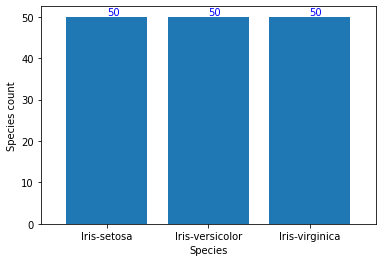

In [17]:
iris['Species'].value_counts().plot(kind="bar") # can also be used to check whether data is balanced or not 


ax = iris['Species'].value_counts().plot.bar(width=.8)
for i, v in iris['Species'].value_counts().reset_index().iterrows():
    ax.text(i, v.Species + 0.3, v.Species, color='blue')

plt.xticks(rotation="horizontal")
plt.xlabel('Species')
plt.ylabel('Species count')


Seeing at skew

In [18]:
skew = iris.skew()
print(skew)

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Histogram plot

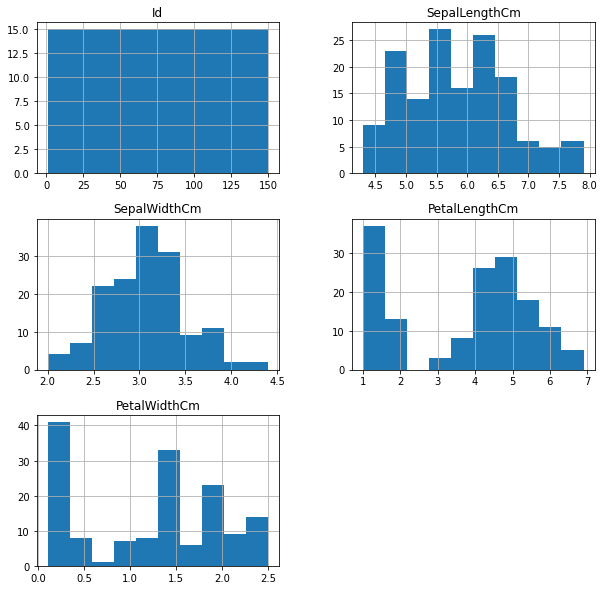

In [19]:
iris.hist(figsize=(10,10))
plt.show()

Density Plots

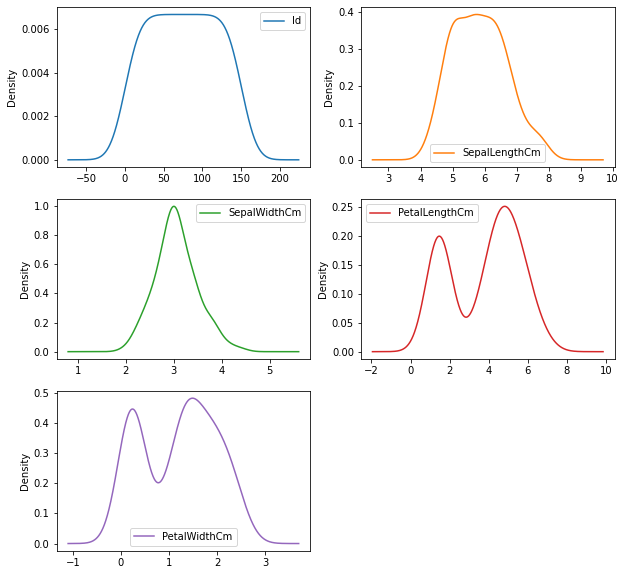

In [22]:
iris.plot(kind = 'density',subplots = True, layout = (3,2), sharex = False,figsize = (10,10))
plt.show()

Boxplot ( Grouped by species )

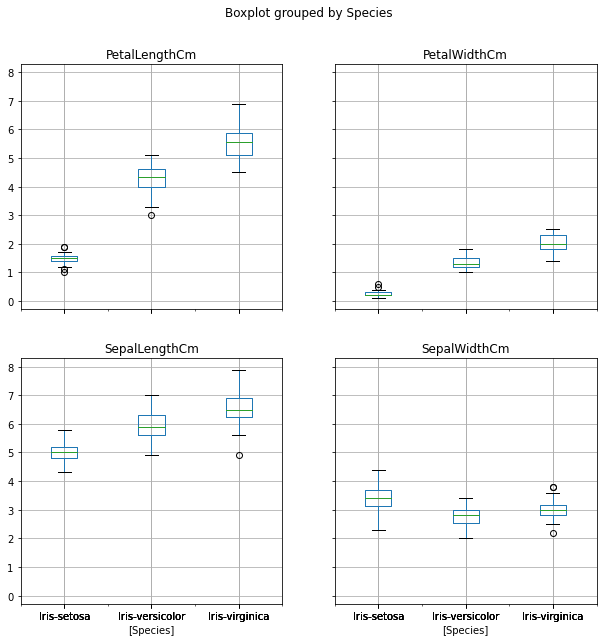

In [23]:
iris.drop("Id", axis=1).boxplot(by = "Species", figsize=(10,10))
plt.show()

Heatmap ( using seaborn - for showing correlation )

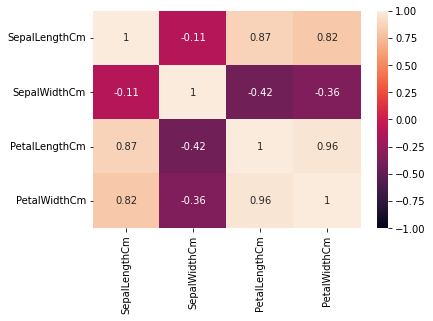

In [24]:
sns.heatmap(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

Parplot ( plot relation pairwise )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


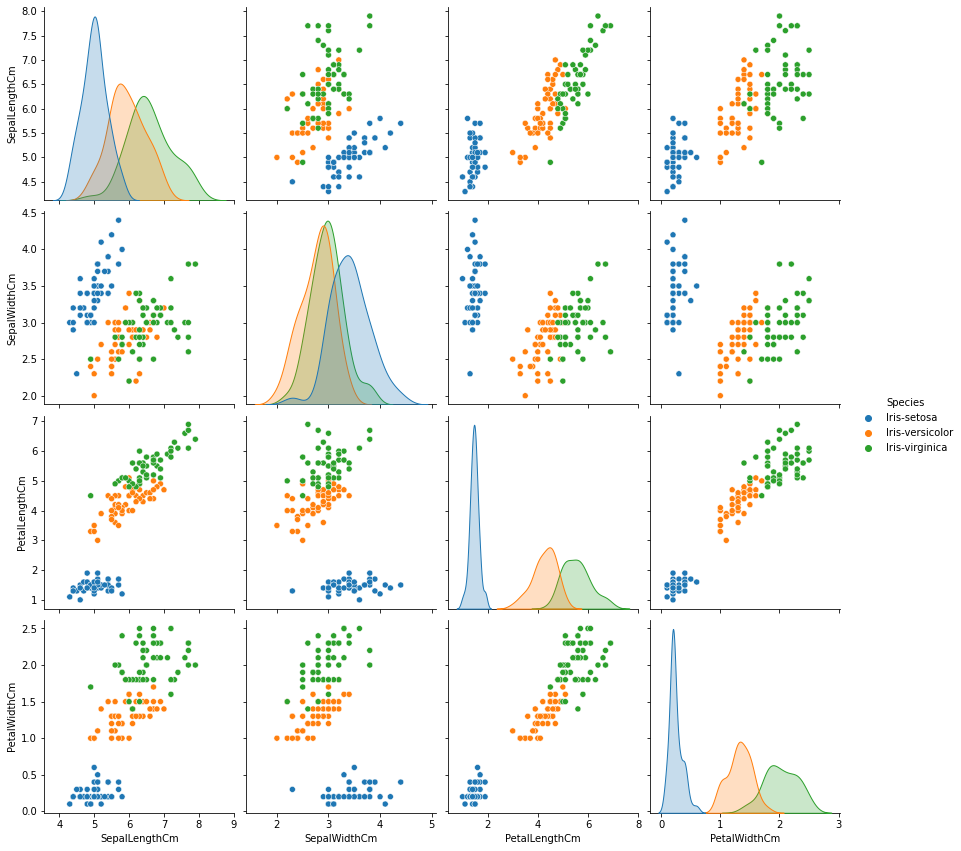

In [25]:
sns.pairplot(iris.drop("Id", axis = 1), hue="Species", size=3)
plt.show()

Dropping duplicates


In [28]:
data = iris.drop_duplicates(subset= "Species")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [29]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Comparing Sepal Length and Sepal Width 

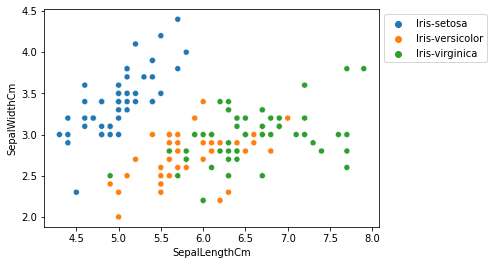

In [31]:
# I will be using scatter plot for this 
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

# we can see the Species Setosa has lower Sepal Length but larger Sepal Width, Species Versicolor - has bigger Sepal Length but smaller Sepal Width ( Same for Species Virginica )

Comparing Petal Width and Petal Length 

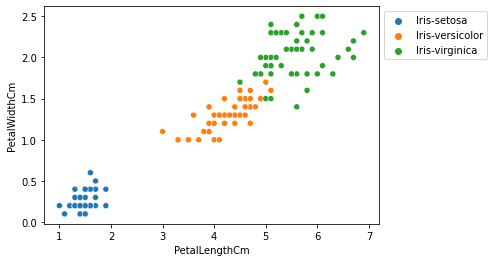

In [32]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris, )
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()


# From the above plot, we can infer that – 

# Species Setosa has smaller petal lengths and widths.
# Versicolor Species lies in the middle of the other two species in terms of petal length and width
# Species Virginica has the largest of petal lengths and widths.

Distplot ( used for univariant set of observations )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

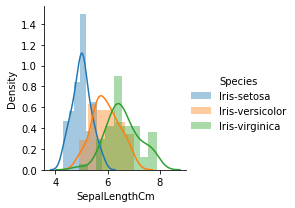

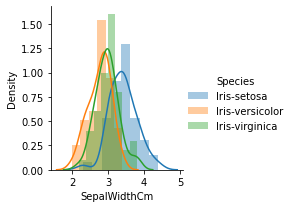

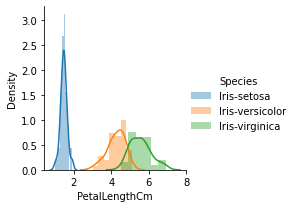

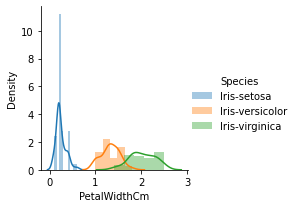

In [33]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
  
plt.show()

Handling Outliers

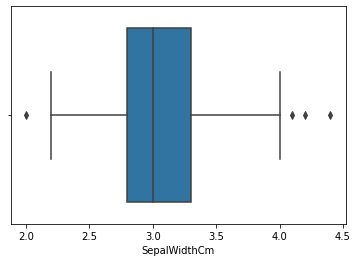

In [34]:
sns.boxplot(x='SepalWidthCm', data=iris)

Old Shape:  (150, 6)
New Shape:  (146, 6)


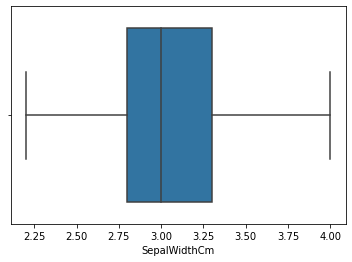

In [35]:
# Removing Outliers 
# using the IQR method 

# IQR
Q1 = np.percentile(iris['SepalWidthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(iris['SepalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", iris.shape)
  
# Upper bound
upper = np.where(iris['SepalWidthCm'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(iris['SepalWidthCm'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
iris.drop(upper[0], inplace = True)
iris.drop(lower[0], inplace = True)
  
print("New Shape: ", iris.shape)
  
sns.boxplot(x='SepalWidthCm', data=iris)